# Anime Rating Full Dataset - Exploratory Data Analysis
This notebook contains an exploratory data analysis (EDA) of the complete top anime dataset fetched from the Jikan API. The goal is to understand the structure, patterns, and distribution of the data before modeling.

In [10]:
# Standard library imports
import json

# Third-party imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import the current working directory
import sys
from pathlib import Path

# Add the parent directory of 'src' to sys.path
sys.path.append(str(Path().resolve().parent))

# Local application imports
from src.preprocessing import (
    fill_missing_values,
    convert_types,
    clean_string_columns,
    convert_list_columns,
    add_missing_indicators,
    drop_duplicates_by_title,
    filter_impossible_scores,
    reorder_columns
)

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Data Loading
We load the raw `top_anime_all.json` dataset which contains over 29,000 anime records. The data is prepared to be processed in the next steps.

In [11]:
# Import display function for Jupyter Notebook
from IPython.display import display
from pathlib import Path

# Load `top_anime_all.json` from `data/raw`
data_path = Path("../data/raw/top_anime_all.json")
with data_path.open(encoding="utf-8") as f:
    anime_data = json.load(f)

# Convert list of dict to DataFrame
df = pd.json_normalize(anime_data)

# Show basic info and preview
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29118 entries, 0 to 29117
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mal_id                            29118 non-null  int64  
 1   url                               29118 non-null  object 
 2   approved                          29118 non-null  bool   
 3   titles                            29118 non-null  object 
 4   title                             29118 non-null  object 
 5   title_english                     12510 non-null  object 
 6   title_japanese                    28931 non-null  object 
 7   title_synonyms                    29118 non-null  object 
 8   type                              29032 non-null  object 
 9   source                            29118 non-null  object 
 10  episodes                          28313 non-null  float64
 11  status                            29118 non-null  object 
 12  airi

,mal_id,url,approved,titles,title,title_english,title_japanese,title_synonyms,type,source,...,aired.prop.from.month,aired.prop.from.year,aired.prop.to.day,aired.prop.to.month,aired.prop.to.year,aired.string,broadcast.day,broadcast.time,broadcast.timezone,broadcast.string
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,True,"[{'type': 'Default', 'title': 'Sousou no Frier...",Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,"[Frieren at the Funeral, Frieren The Slayer]",TV,Manga,...,9.0,2023.0,22.0,3.0,2024.0,"Sep 29, 2023 to Mar 22, 2024",Fridays,23:00,Asia/Tokyo,Fridays at 23:00 (JST)
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,True,"[{'type': 'Default', 'title': 'Fullmetal Alche...",Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,[Hagane no Renkinjutsushi: Fullmetal Alchemist...,TV,Manga,...,4.0,2009.0,4.0,7.0,2010.0,"Apr 5, 2009 to Jul 4, 2010",Sundays,17:00,Asia/Tokyo,Sundays at 17:00 (JST)
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,True,"[{'type': 'Default', 'title': 'Steins;Gate'}, ...",Steins;Gate,Steins;Gate,STEINS;GATE,[],TV,Visual novel,...,4.0,2011.0,14.0,9.0,2011.0,"Apr 6, 2011 to Sep 14, 2011",Wednesdays,02:05,Asia/Tokyo,Wednesdays at 02:05 (JST)
3,38524,https://myanimelist.net/anime/38524/Shingeki_n...,True,"[{'type': 'Default', 'title': 'Shingeki no Kyo...",Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[],TV,Manga,...,4.0,2019.0,1.0,7.0,2019.0,"Apr 29, 2019 to Jul 1, 2019",Mondays,00:10,Asia/Tokyo,Mondays at 00:10 (JST)
4,28977,https://myanimelist.net/anime/28977/Gintama°,True,"[{'type': 'Default', 'title': 'Gintama°'}, {'t...",Gintama°,Gintama Season 4,銀魂°,[Gintama' (2015)],TV,Manga,...,4.0,2015.0,30.0,3.0,2016.0,"Apr 8, 2015 to Mar 30, 2016",Wednesdays,18:00,Asia/Tokyo,Wednesdays at 18:00 (JST)


## 2. Data Overview
We start by checking the shape of the dataset, previewing the top rows, and reviewing basic statistics.

In [12]:
# Summary statistics for numeric columns
df.describe()

,mal_id,episodes,score,scored_by,rank,popularity,members,favorites,year,aired.prop.from.day,aired.prop.from.month,aired.prop.from.year,aired.prop.to.day,aired.prop.to.month,aired.prop.to.year
count,29118.00000,28313.000000,18660.000000,1.866000e+04,22178.000000,29118.000000,2.911800e+04,29118.000000,6213.000000,28158.000000,28158.000000,28158.000000,11120.000000,11120.000000,11120.000000
mean,34049.90954,14.036909,6.398225,2.990151e+04,10742.668771,14140.754035,3.804387e+04,424.279415,2009.923869,12.273777,5.775481,2009.182790,19.303597,6.651259,2011.174101
std,19583.02791,47.158861,0.890313,1.213770e+05,6385.513253,8335.902023,1.651487e+05,4464.441697,13.195280,9.831059,3.683585,15.049091,9.168257,3.584896,11.603265
min,1.00000,1.000000,1.890000,1.010000e+02,0.000000,0.000000,0.000000e+00,0.000000,1961.000000,1.000000,1.000000,1917.000000,1.000000,1.000000,1962.000000
25%,15712.50000,1.000000,5.780000,3.400000e+02,5207.000000,6914.500000,2.210000e+02,0.000000,2004.000000,3.000000,2.000000,2004.000000,13.000000,3.000000,2006.000000
50%,38041.00000,2.000000,6.370000,1.538000e+03,10732.000000,14125.000000,1.039000e+03,1.000000,2014.000000,10.000000,6.000000,2014.000000,22.000000,6.000000,2014.000000
75%,50637.50000,13.000000,7.030000,1.013950e+04,16258.750000,21357.750000,8.987500e+03,17.000000,2020.000000,21.000000,9.000000,2020.000000,26.000000,9.000000,2020.000000
max,61990.00000,3057.000000,9.300000,2.949019e+06,21777.000000,28582.000000,4.184275e+06,239661.000000,2026.000000,31.000000,12.000000,2027.000000,31.000000,12.000000,2025.000000


In [13]:
# Check missing values
df.isna().sum().sort_values(ascending=False)

broadcast.timezone                  24960
broadcast.time                      24960
broadcast.day                       24960
trailer.youtube_id                  23583
trailer.images.small_image_url      23583
trailer.images.image_url            23583
trailer.images.medium_image_url     23583
trailer.url                         23583
trailer.images.large_image_url      23583
trailer.images.maximum_image_url    23583
trailer.embed_url                   23582
year                                22905
season                              22905
broadcast.string                    20722
aired.to                            17998
aired.prop.to.month                 17998
aired.prop.to.year                  17998
aired.prop.to.day                   17998
title_english                       16608
score                               10458
scored_by                           10458
rank                                 6940
synopsis                             5160
aired.from                        

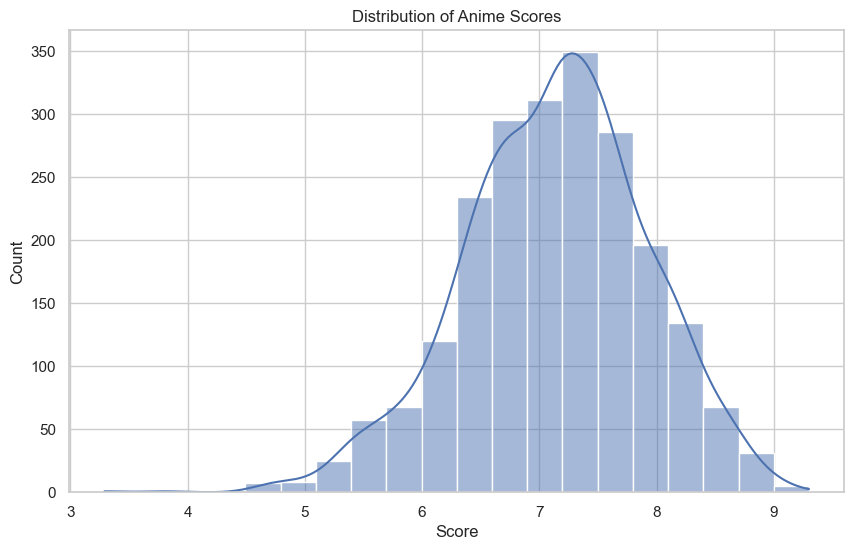

In [14]:
# Plot distribution of anime scores
sns.histplot(data=df.dropna(), x="score", bins=20, kde=True)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

## 3. Data Cleaning Process

Before summarizing the cleaned data, we applied several preprocessing steps to prepare the dataset for analysis and modeling:

- **Missing Values Handling**: Filled missing values with standard placeholders (e.g., `-1` for year, `"Unknown"` for rating).
- **Type Conversion**: Converted numeric columns (e.g., `episodes`, `year`, `rank`) to integers.
- **String Cleaning**: Standardized string columns by trimming and capitalizing text.
- **List Column Conversion**: Converted nested lists (e.g., genres and demographics) to comma-separated strings.
- **Indicator Columns**: Added `has_year` and `has_season` columns to mark original presence of these values.
- **Duplicate Removal**: Dropped duplicate anime titles to ensure uniqueness.
- **Invalid Score Filtering**: Removed anime entries with scores outside the 0–10 range (except for missing `-1` placeholders).
- **Column Reordering**: Ensured consistent column order for better readability.

All cleaning steps were modularized and handled in `src/preprocessing.py` for reuse and clarity.

In [15]:
# Select relevant columns only
columns_to_keep = [
    "title", "type", "source", "episodes", "status", "rating",
    "score", "scored_by", "rank", "popularity", "members", "favorites",
    "year", "season", "genres", "demographics"
]
df_selected = df[columns_to_keep]

# Preprocessing pipeline using functions from preprocessing.py
df_selected = add_missing_indicators(df_selected)
df_selected = fill_missing_values(df_selected)
df_selected = convert_types(df_selected)
df_selected = clean_string_columns(df_selected)
df_selected = convert_list_columns(df_selected)
df_selected = drop_duplicates_by_title(df_selected)
df_selected = filter_impossible_scores(df_selected)

# Reorder columns if needed
desired_order = [
    "title", "type", "source", "episodes", "status", "rating",
    "score", "scored_by", "rank", "popularity", "members", "favorites",
    "year", "season", "has_year", "has_season", "genres", "demographics"
]
df_selected = reorder_columns(df_selected, desired_order)

# Final check and save
display(df_selected.head())
df_selected.info()
df_selected.to_csv("../data/processed/clean_anime_full.csv", index=False)

D:\3-CODING_PROJECTS\anime-rating-predictor\src\preprocessing.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_year"] = df["year"].notna().astype(int)
D:\3-CODING_PROJECTS\anime-rating-predictor\src\preprocessing.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_season"] = df["season"].notna().astype(int)


,title,type,source,episodes,status,rating,score,scored_by,rank,popularity,members,favorites,year,season,has_year,has_season,genres,demographics
0,Sousou no Frieren,Tv,Manga,28,Finished Airing,PG-13 - TEENS 13 OR OLDER,9.30,686846.0,1,139,1157346,71546,2023,Fall,1,1,"Adventure, Drama, Fantasy",Shounen
1,Fullmetal Alchemist: Brotherhood,Tv,Manga,64,Finished Airing,R - 17+ (VIOLENCE & PROFANITY),9.10,2227771.0,2,3,3539957,234693,2009,Spring,1,1,"Action, Adventure, Drama, Fantasy",Shounen
2,Steins;Gate,Tv,Visual Novel,24,Finished Airing,PG-13 - TEENS 13 OR OLDER,9.07,1470245.0,3,14,2711161,196638,2011,Spring,1,1,"Drama, Sci-Fi, Suspense",
3,Shingeki no Kyojin Season 3 Part 2,Tv,Manga,10,Finished Airing,R - 17+ (VIOLENCE & PROFANITY),9.05,1705642.0,4,21,2462353,61277,2019,Spring,1,1,"Action, Drama, Suspense",Shounen
4,Gintama°,Tv,Manga,51,Finished Airing,PG-13 - TEENS 13 OR OLDER,9.05,264741.0,5,342,670599,17213,2015,Spring,1,1,"Action, Comedy, Sci-Fi",Shounen


<class 'pandas.core.frame.DataFrame'>
Index: 28878 entries, 0 to 29117
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         28878 non-null  object 
 1   type          28878 non-null  object 
 2   source        28878 non-null  object 
 3   episodes      28878 non-null  int64  
 4   status        28878 non-null  object 
 5   rating        28878 non-null  object 
 6   score         28878 non-null  float64
 7   scored_by     28878 non-null  float64
 8   rank          28878 non-null  int64  
 9   popularity    28878 non-null  int64  
 10  members       28878 non-null  int64  
 11  favorites     28878 non-null  int64  
 12  year          28878 non-null  int64  
 13  season        28878 non-null  object 
 14  has_year      28878 non-null  int64  
 15  has_season    28878 non-null  int64  
 16  genres        28878 non-null  object 
 17  demographics  28878 non-null  object 
dtypes: float64(2), int64(8), object

## 4. Data Cleaning Recap
This section summarizes the preprocessing steps applied on the raw dataset, such as:

- Handling missing values (e.g., year, season, score)
- Converting data types (e.g., episodes to int)
- Transforming list-type columns into comma-separated strings
- Adding flags for missing year/season

These were handled in `src/preprocessing.py`.

## 5. Missing Value Summary
Below is the summary of remaining missing values, if any, after preprocessing.

In [16]:
# Display missing values in descending order
df_selected.isna().sum().sort_values(ascending=False)

title           0
type            0
source          0
episodes        0
status          0
rating          0
score           0
scored_by       0
rank            0
popularity      0
members         0
favorites       0
year            0
season          0
has_year        0
has_season      0
genres          0
demographics    0
dtype: int64

Most of the missing values were successfully handled during the preprocessing stage.  
Features such as `year`, `season`, and `score` were filled with placeholders or cleaned.  
The final dataset is now ready for further analysis or modeling.

## 6. Duplicate Check
We check for any duplicate entries based on the anime titles.

In [17]:
# Check for duplicates by title
duplicates = df_selected.duplicated(subset=["title"])
print("Total duplicates:", duplicates.sum())

# Optionally display duplicates (if any)
df_selected[duplicates]

Total duplicates: 0


,title,type,source,episodes,status,rating,score,scored_by,rank,popularity,members,favorites,year,season,has_year,has_season,genres,demographics


No duplicate titles found. The dataset contains unique anime entries.

## 7. Feature Description

Below is a brief explanation of each column included in the final cleaned dataset:

| Feature        | Description |
|----------------|-------------|
| `title`        | Title of the anime. |
| `type`         | Type of media (e.g., TV, Movie, OVA). |
| `source`       | Original source material (e.g., Manga, Novel, Original). |
| `episodes`     | Total number of episodes. |
| `status`       | Airing status (e.g., Finished Airing, Currently Airing). |
| `rating`       | Age rating classification (e.g., PG-13, R). |
| `score`        | Average user score from MyAnimeList (range: 0–10). |
| `scored_by`    | Number of users who rated the anime. |
| `rank`         | Overall rank based on score. |
| `popularity`   | Popularity rank based on number of members. |
| `members`      | Number of users who added the anime to their list. |
| `favorites`    | Number of users who marked the anime as a favorite. |
| `year`         | Release year of the anime. |
| `season`       | Season of release (e.g., Spring, Fall). |
| `has_year`     | Binary indicator (1 if original `year` was present, 0 if filled). |
| `has_season`   | Binary indicator (1 if original `season` was present, 0 if filled). |
| `genres`       | List of genres the anime belongs to (as a comma-separated string). |
| `demographics` | Target demographic groups (e.g., Shounen, Seinen). |

## 8. Visual Explorations
In the next section, we will explore the dataset using various visualizations to uncover trends, relationships, and patterns.

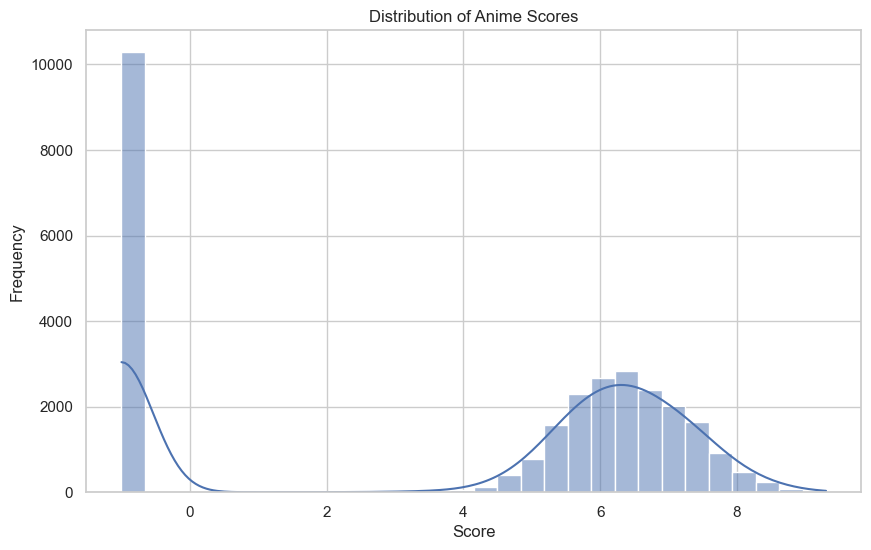

In [18]:
# Plot distribution of anime scores
sns.histplot(data=df_selected, x="score", bins=30, kde=True)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

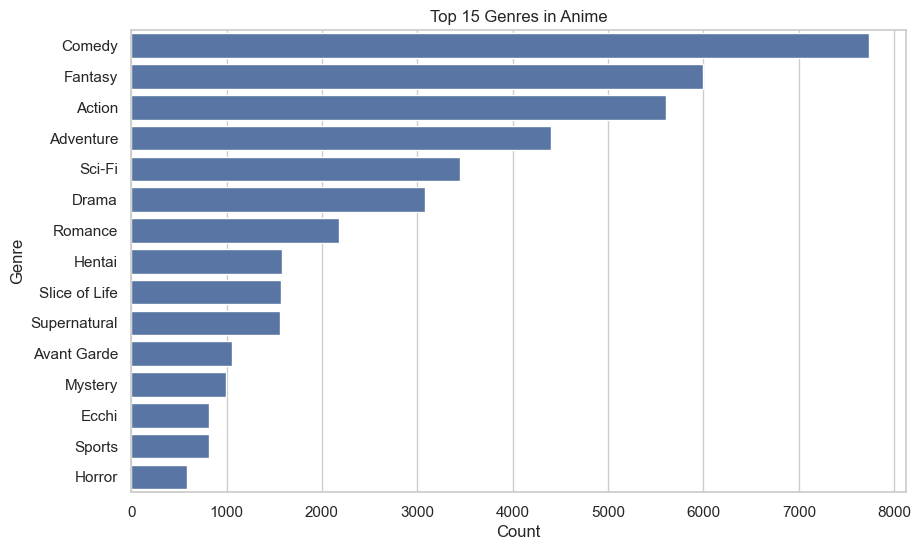

In [ ]:
# Plot top 15 genres in anime
genre_series = df_selected["genres"].str.split(", ")
genre_counts = Counter([genre for sublist in genre_series for genre in sublist if genre])
top_genres = pd.DataFrame(genre_counts.most_common(15), columns=["Genre", "Count"])

# Plotting the top genres
sns.barplot(data=top_genres, y="Genre", x="Count")
plt.title("Top 15 Genres in Anime")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

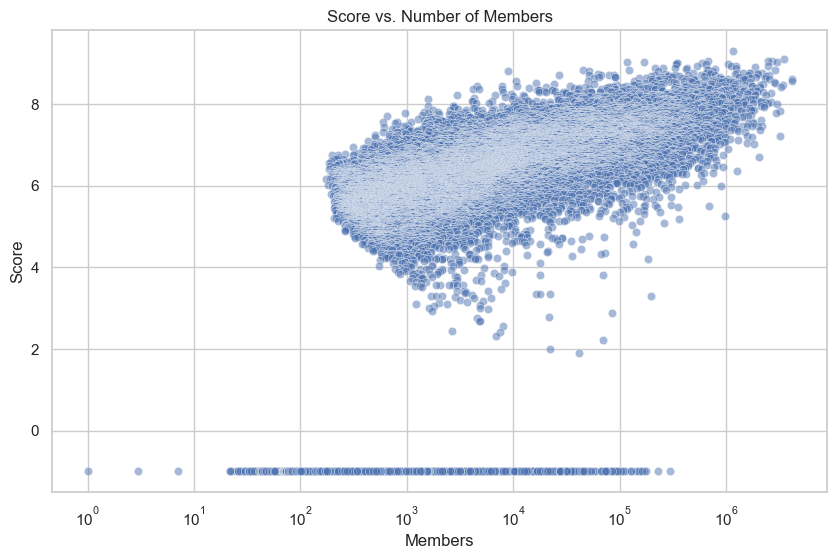

In [ ]:
# Plot score vs number of members
sns.scatterplot(data=df_selected, x="members", y="score", alpha=0.5)
plt.title("Score vs Number of Members")
plt.xlabel("Members")
plt.ylabel("Score")
plt.xscale("log")
plt.show()

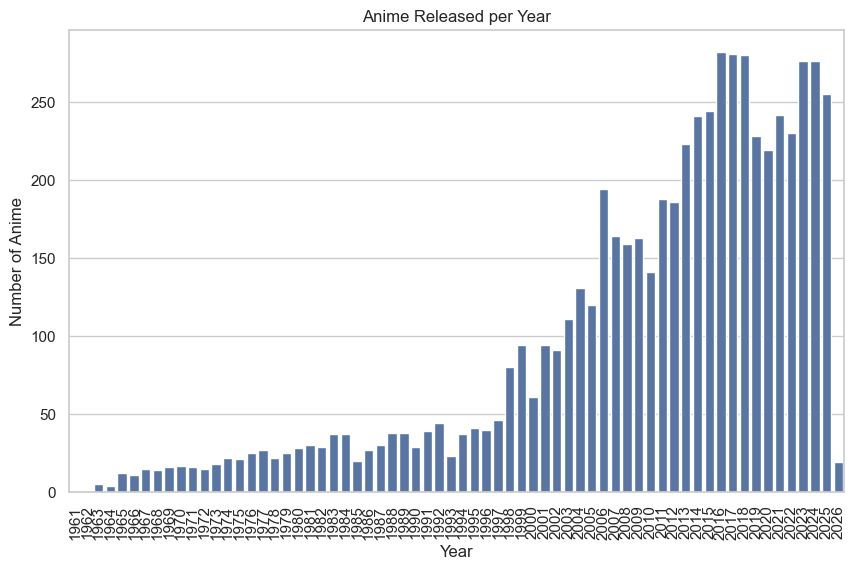

In [26]:
sns.countplot(data=df_selected[df_selected["year"] > 0], x="year")
plt.title("Anime Released per Year")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.show()

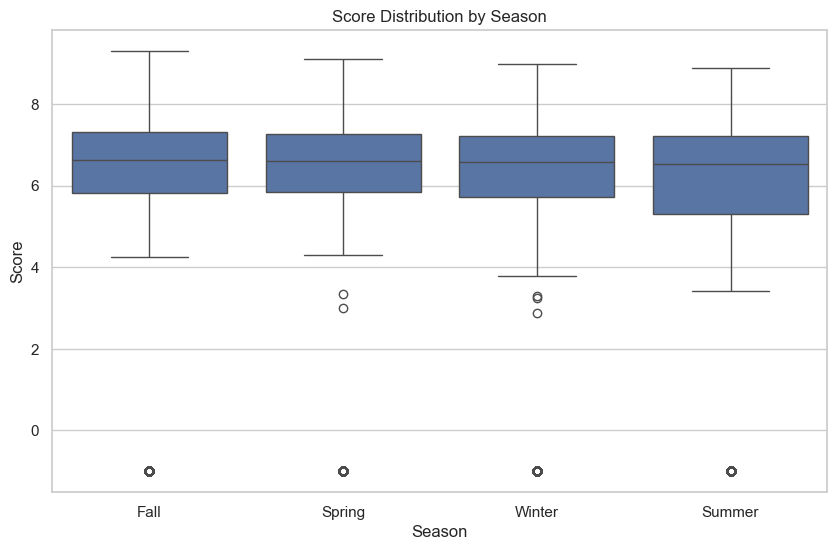

In [27]:
# Plot score distribution by season
sns.boxplot(data=df_selected[df_selected["season"] != "Unknown"], x="season", y="score")
plt.title("Score Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Score")
plt.show()
